# Plot histograms

In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle

In [2]:
nams = ['ra', 'dec', 'pmra','pmdec','phot_g_mean_mag','parallax']

In [3]:
Gaia.MAIN_GAIA_TABLE = 'gaiadr3.gaia_source'
Gaia.ROW_LIMIT = 10000
center = [Angle('16h23m35.22s'), Angle('-26d31m32.7s')]
coord = SkyCoord(center[0].to(u.deg), center[1], frame='icrs', unit='deg')
r = Gaia.query_object_async(coordinate=coord, radius=u.Quantity(10, u.arcmin), columns=nams)

INFO: Query finished. [astroquery.utils.tap.core]


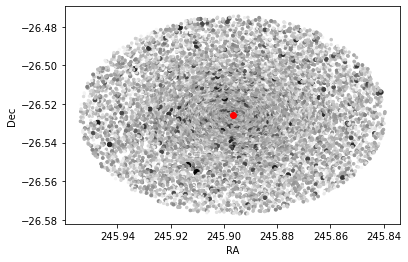

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x=r['ra'], y=r['dec'], s=5**(np.max(r['phot_g_mean_mag'])/r['phot_g_mean_mag']), c=(np.max(r['phot_g_mean_mag'])-r['phot_g_mean_mag'])/(np.max(r['phot_g_mean_mag'])-np.min(r['phot_g_mean_mag'])), cmap='binary')
ax.scatter(center[0].to(u.deg), center[1], c='red')
ax.invert_xaxis()
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [5]:
from astropy.table import QTable
gaia_tab = QTable()

for i, nam in enumerate(nams):
    gaia_tab[f'{nam}'] = np.ma.filled(r[f'{nam}'], np.nan)

gaia_tab

ra,dec,pmra,pmdec,phot_g_mean_mag,parallax
deg,deg,mas / yr,mas / yr,mag,mas
float64,float64,float64,float64,float32,float64
245.89664833202013,-26.525590106554876,nan,nan,18.362773895263672,nan
245.89712775530808,-26.525762888427117,nan,nan,18.140827178955078,nan
245.89673596469805,-26.526193922205852,-9.226558383768225,-18.165771850691428,17.528026580810547,1.3809163558181563
245.89685657945373,-26.525260542164258,nan,nan,18.01624870300293,nan
245.89735842525616,-26.526178154866948,nan,nan,16.957914352416992,nan
245.89711042822663,-26.526428132066663,nan,nan,17.963237762451172,nan
245.89682636635126,-26.526515896287464,nan,nan,17.77305030822754,nan
245.89590888250333,-26.52559953937773,-13.425757889414356,-18.730147165626676,17.065292358398438,0.331910677018349


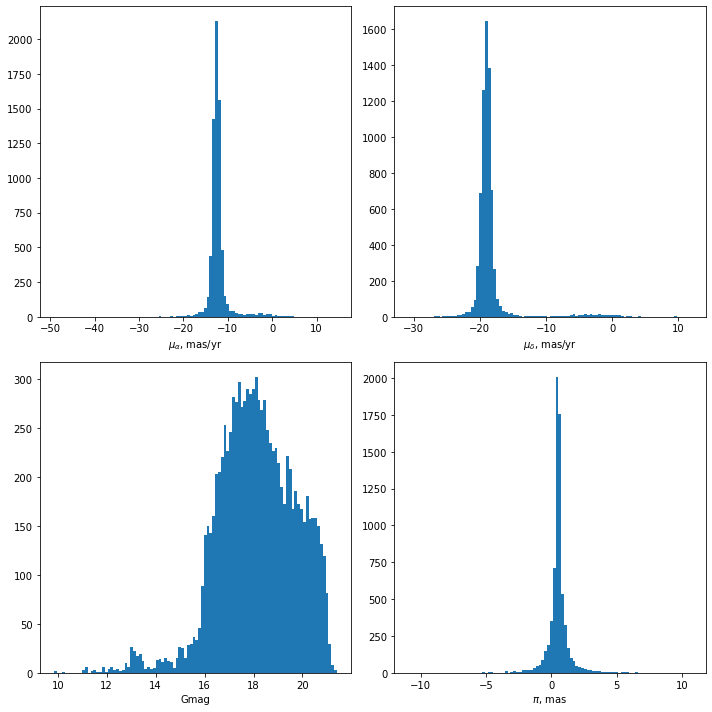

In [6]:
n_bins = 100

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=False, tight_layout=True)
axs[0][0].hist(gaia_tab['pmra'].value, bins=n_bins)
axs[0][0].set_xlabel('$\\mu_\\alpha$, mas/yr')

axs[0][1].hist(gaia_tab['pmdec'].value, bins=n_bins)
axs[0][1].set_xlabel('$\\mu_\\delta$, mas/yr')

axs[1][0].hist(gaia_tab['phot_g_mean_mag'].value, bins=n_bins)
axs[1][0].set_xlabel('Gmag')

axs[1][1].hist(gaia_tab['parallax'].value, bins=n_bins)
axs[1][1].set_xlabel('$\\pi$, mas')

plt.show()